In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [123]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/TATASTEEL.csv")

In [124]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13,NaN,NaN,NaN
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13,NaN,NaN,NaN
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13,NaN,NaN,NaN
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13,NaN,NaN,NaN
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13,NaN,NaN,NaN


In [125]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [126]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,403.385658,404.253581,411.210460,396.509197,403.467414,403.553703,404.062991,6.165253e+06,2.664876e+14,93969.268730,1.550750e+06,0.260951
std,187.146366,187.559958,190.791329,183.858461,187.265190,187.312178,187.436529,5.329084e+06,3.012861e+14,58218.860189,1.215813e+06,0.107903
min,67.250000,66.000000,69.700000,66.000000,67.300000,67.250000,67.970000,2.329100e+04,2.159165e+11,2796.000000,2.415800e+04,0.045100
25%,275.775000,275.600000,284.412500,270.000000,275.812500,275.937500,276.935000,2.801380e+06,1.118719e+14,57557.250000,7.698500e+05,0.180500
50%,402.850000,403.000000,409.375000,396.650000,402.700000,402.900000,403.430000,4.800300e+06,1.949303e+14,79400.000000,1.250946e+06,0.253000
75%,523.987500,525.000000,534.725000,516.487500,523.950000,524.075000,525.230000,7.833888e+06,3.379640e+14,110710.250000,2.018066e+06,0.327700
max,1031.350000,1024.000000,1052.600000,1011.100000,1035.000000,1034.000000,1031.950000,6.428460e+07,4.881124e+15,626502.000000,2.643472e+07,0.970100


In [127]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [128]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [129]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [130]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [131]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [132]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [133]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,2.790173,0.614973,940.75,21234858,NaN
5302,4.098274,3.105557,977.75,24904515,NaN
5303,2.494802,-1.380711,971.40,20447968,NaN
5304,5.488301,4.918616,1031.35,44718647,NaN
5305,4.104441,0.976562,1034.00,28129738,NaN


In [134]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [135]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [136]:
#Define the prediction model
model = RandomForestRegressor()

In [137]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [138]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8686418221848853


In [139]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [140]:
predictions = model.predict(X_Check)

In [141]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

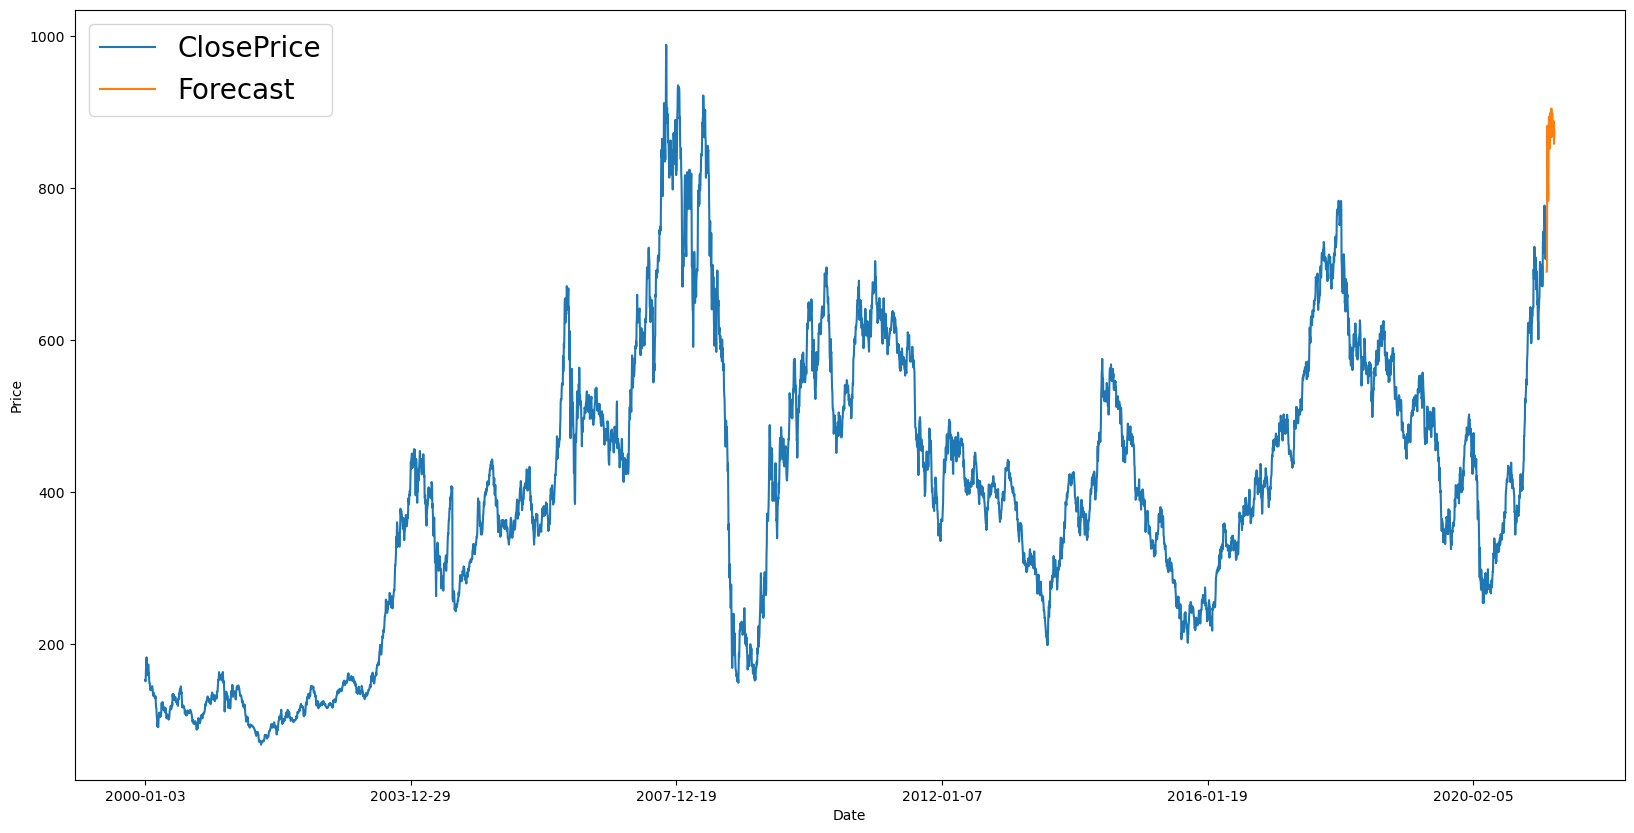

In [142]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')